## kNN, Model Selection

Code from Andreas C. Müller - the author of the O'Reilly book "Introduction to machine learning with Python"

# KNN

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "300"

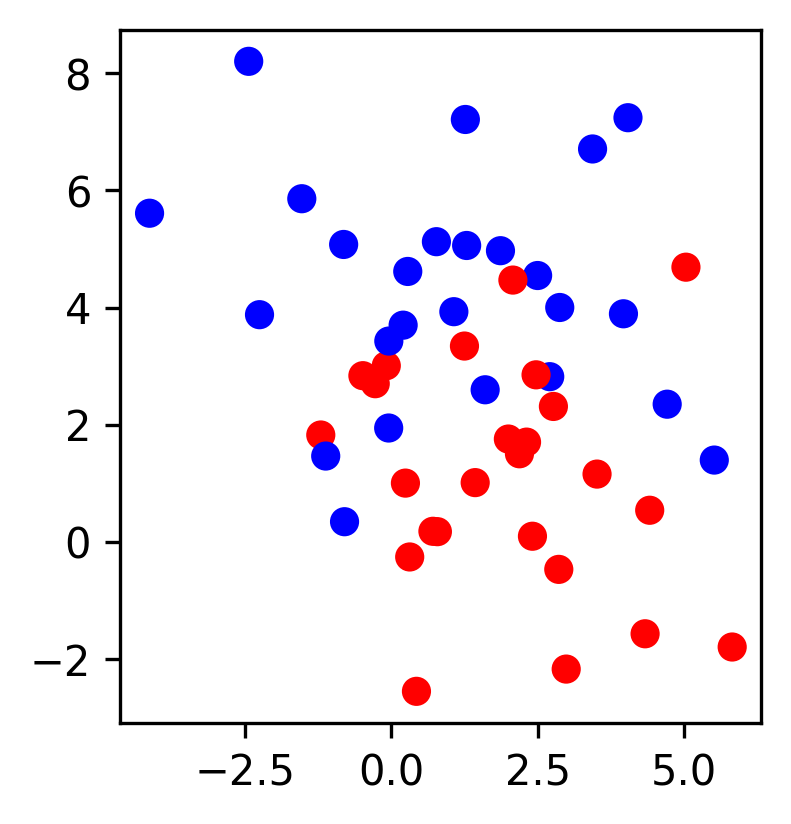

In [2]:
X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)
plt.figure(figsize=(3, 3))
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
#plt.savefig("knn_boundary_dataset.png", bbox_inches='tight')

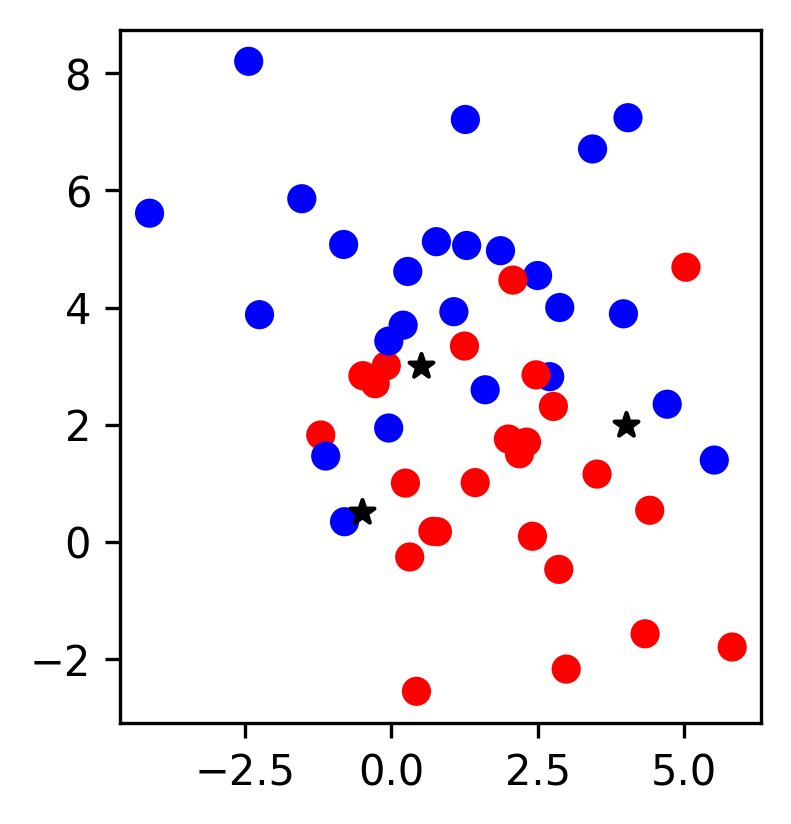

In [3]:
X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])

plt.figure(figsize=(3, 3))
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], c='k', marker="*")
#plt.savefig("knn_boundary_test_points.png", bbox_inches='tight')

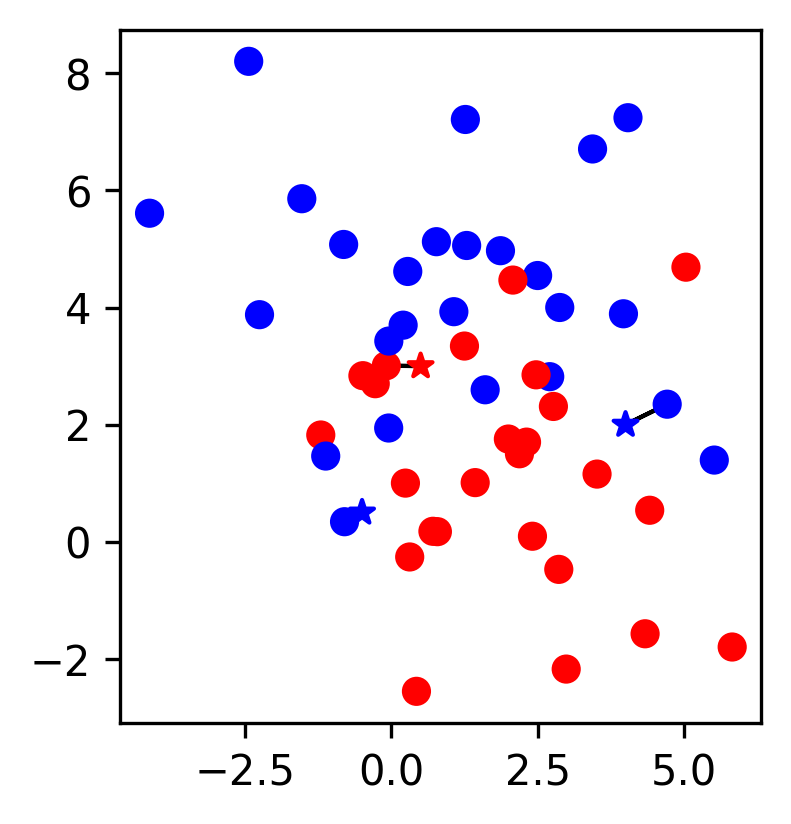

In [4]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

def plot_n_neighbors(X, y, n_neighbors=1):
    X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure(figsize=(3, 3))
    plt.gca().set_aspect("equal")
    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                    X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), marker="*")
    training_points = plt.scatter(X[:, 0], X[:, 1], c=y)
plot_n_neighbors(X, y)
#plt.savefig("knn_boundary_k1.png", bbox_inches='tight')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.77


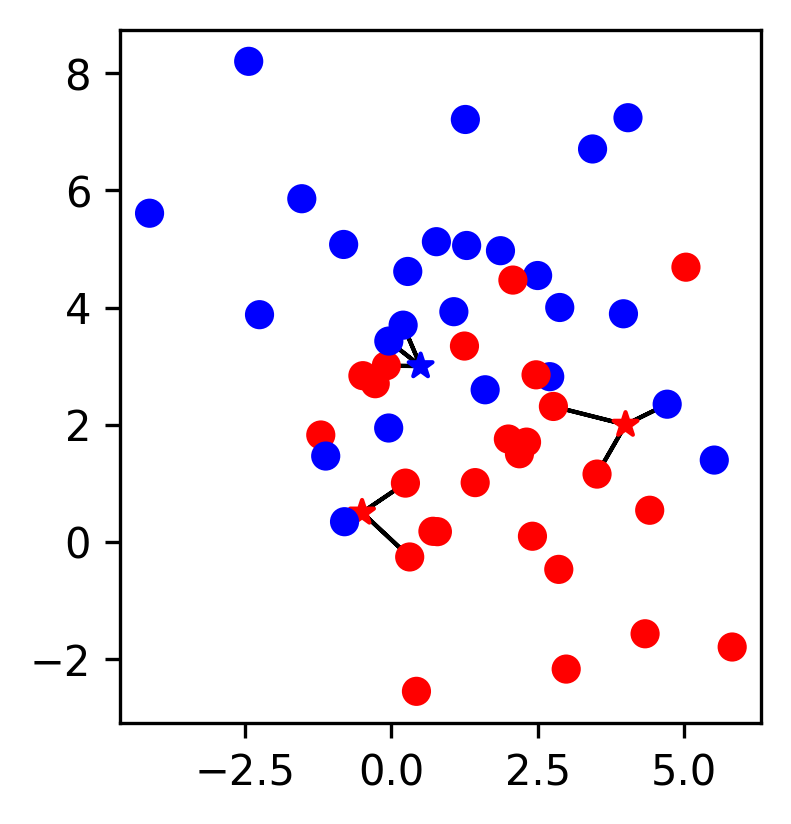

In [6]:
plot_n_neighbors(X, y, n_neighbors=3)
#plt.savefig("knn_boundary_k3.png", bbox_inches='tight')

In [7]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):
    # multiclass
    if eps is None:
      eps = X.std() / 2.

    if ax is None:
      ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    decision_values = classifier.predict(X_grid)
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,
                                                       y_min, y_max),
            aspect='auto', origin='lower', alpha=alpha)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

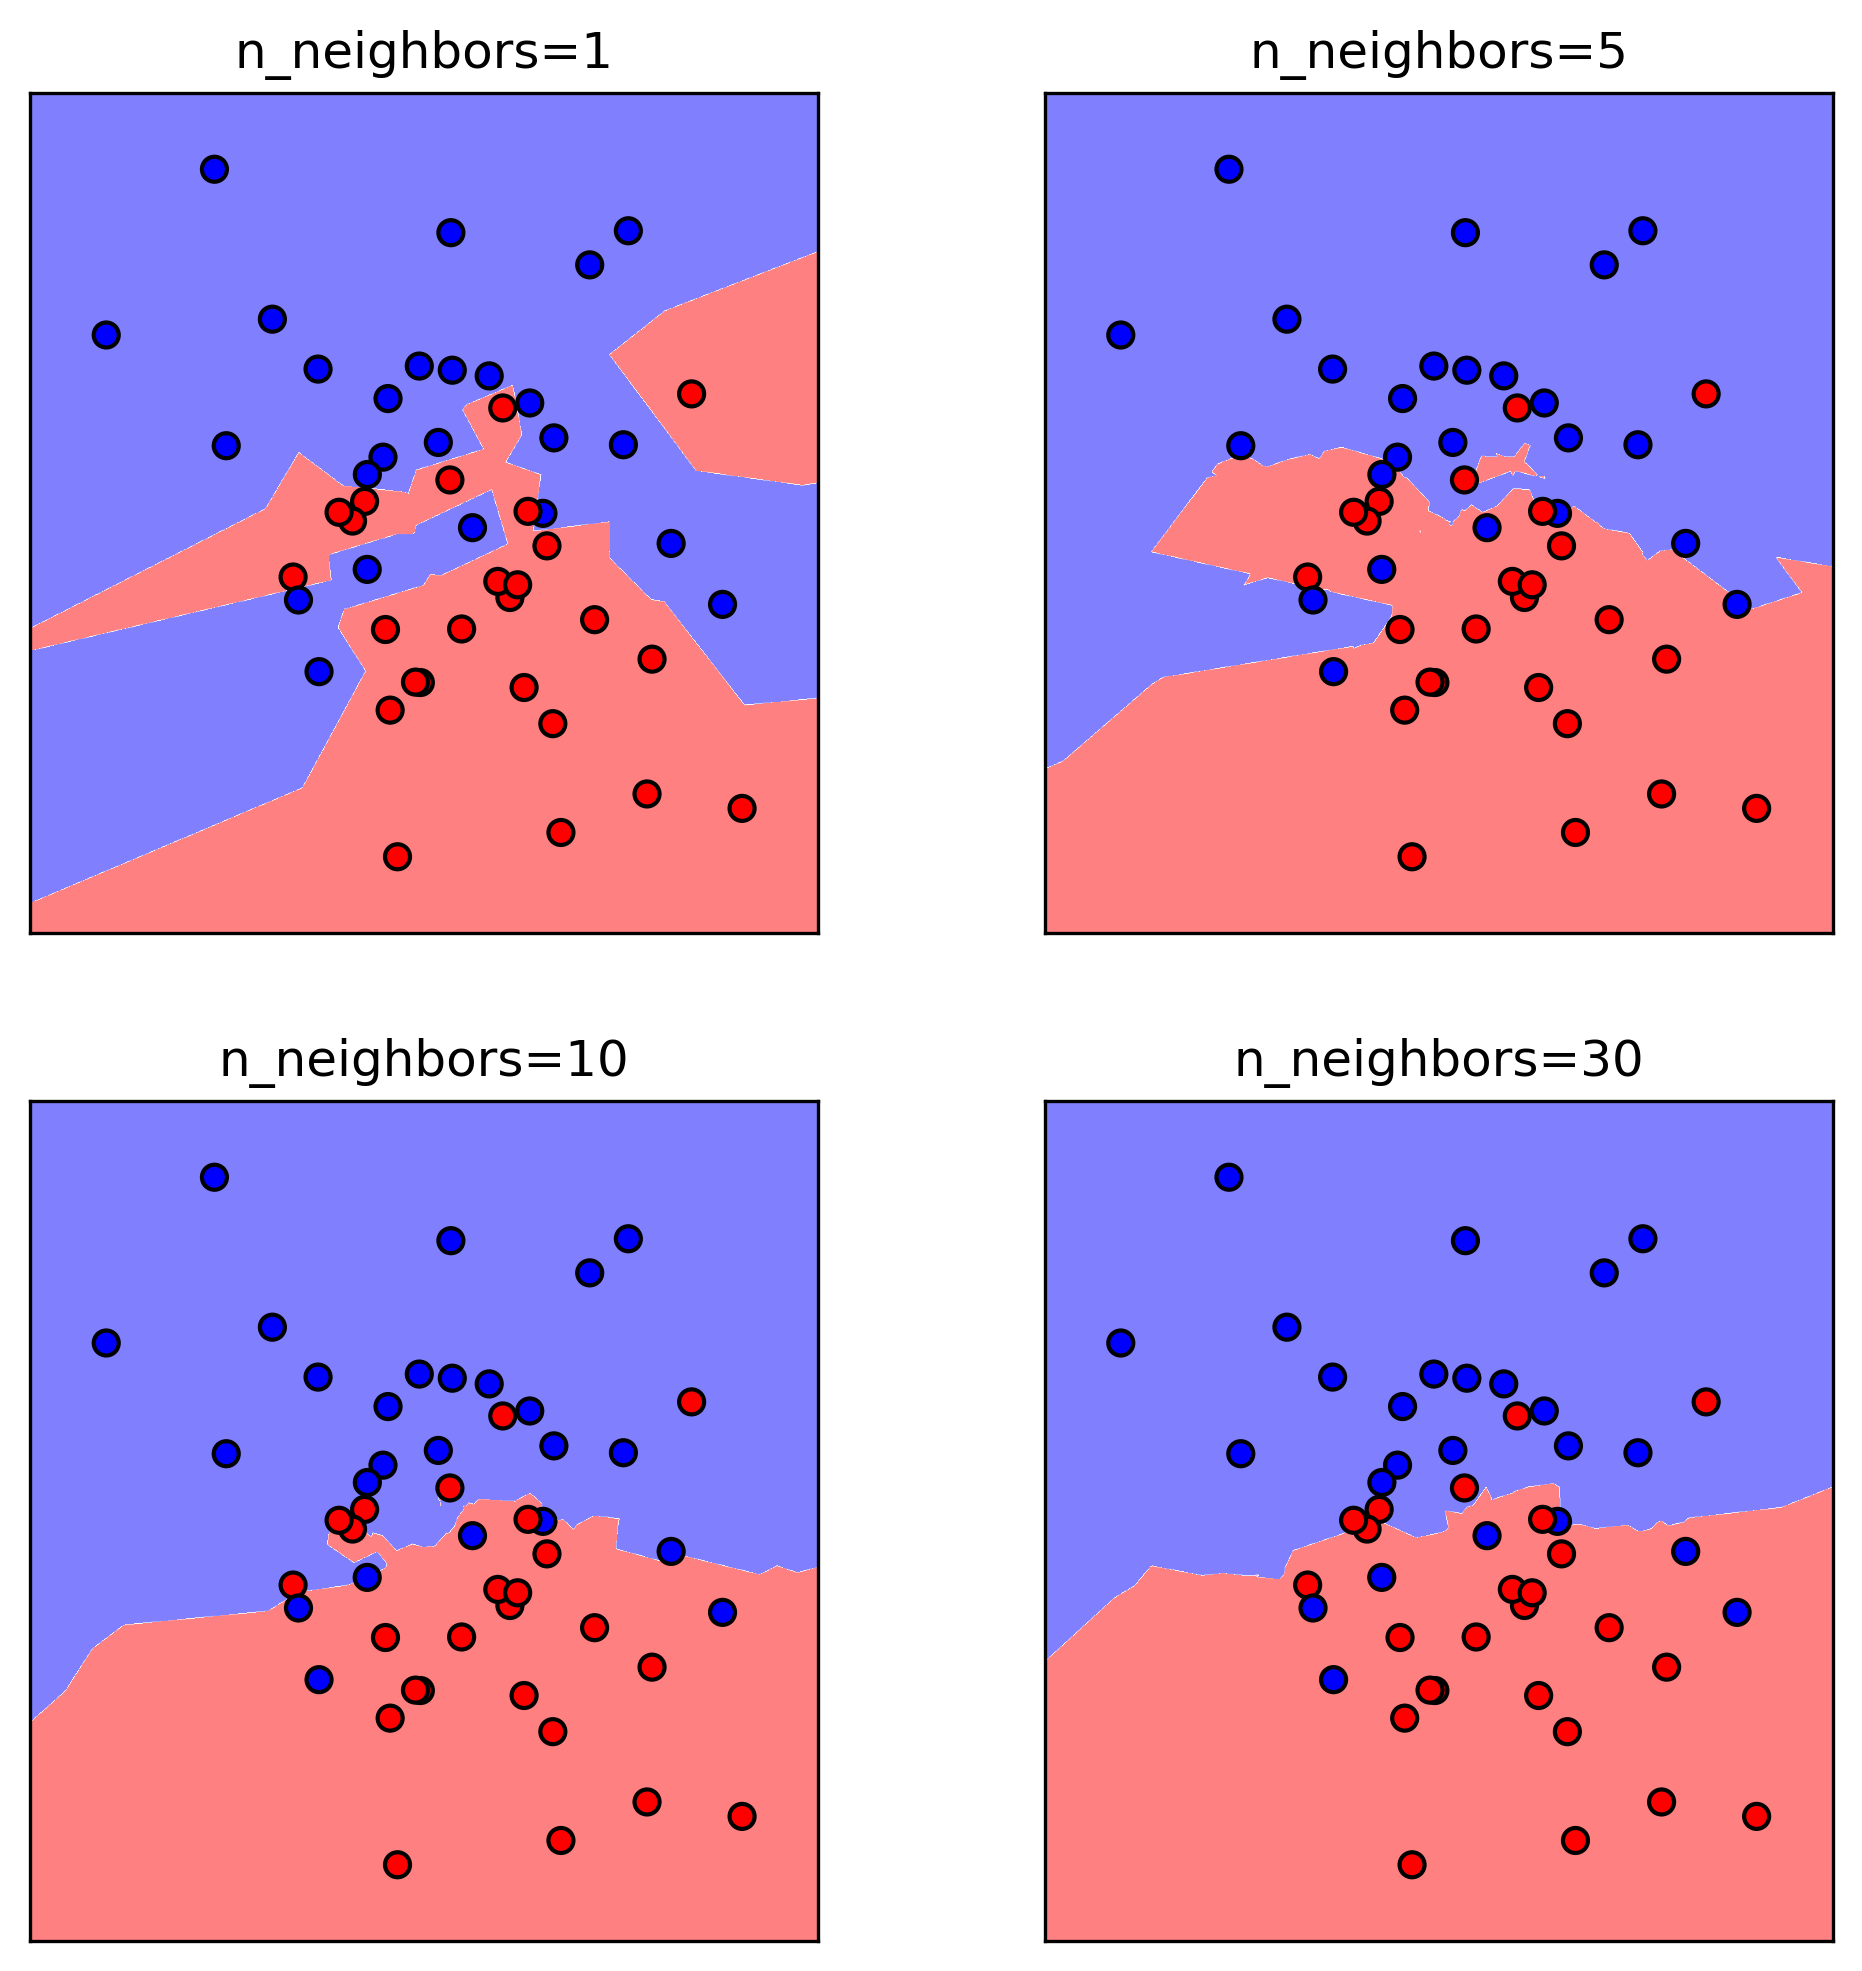

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for ax, n_neighbors in zip(axes.ravel(), [1, 5, 10, 30]):
    ax.set_title("n_neighbors={}".format(n_neighbors))
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plot_2d_classification(clf, X, ax=ax, alpha=.5)
    ax.set_aspect("equal")
#plt.savefig("knn_boundary_varying_k.png", bbox_inches='tight')

In [9]:
neighbors = range(1, 30, 2)

training_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

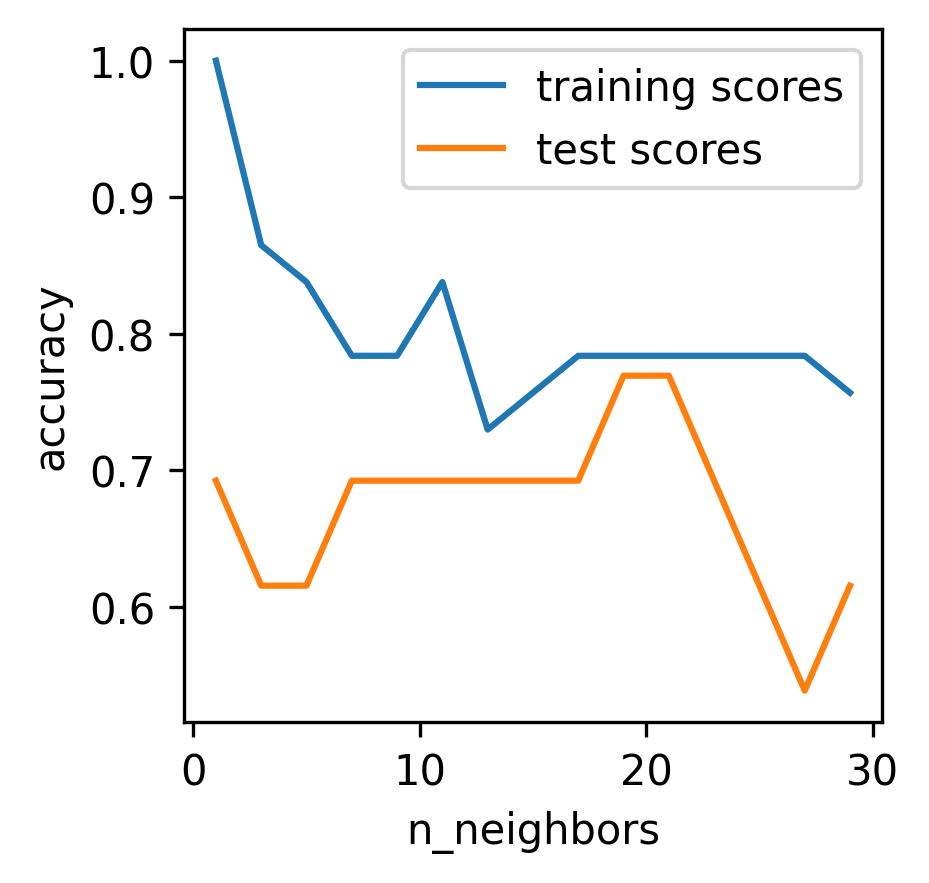

In [10]:
plt.figure(figsize=(3, 3))
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
#plt.savefig("knn_model_complexity.png", bbox_inches='tight')

# Overfitting the validation set

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split


data = load_breast_cancer()
X, y = data.data, data.target
X = scale(X)

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

print("Validation: {:.3f}".format(knn.score(X_val, y_val)))
print("Test: {:.3f}".format(knn.score(X_test, y_test)))

Validation: 0.963
Test: 0.958


In [12]:
val = []
test = []

for i in range(1000):
    rng = np.random.RandomState(i)
    noise = rng.normal(scale=.1, size=X_train.shape)
    knn = KNeighborsClassifier(n_neighbors=5).fit(X_train + noise, y_train)
    val.append(knn.score(X_val, y_val))
    test.append(knn.score(X_test, y_test))

print("Validation: {:.3f}".format(np.max(val)))
print("Test: {:.3f}".format(test[np.argmax(val)]))

Validation: 0.972
Test: 0.951


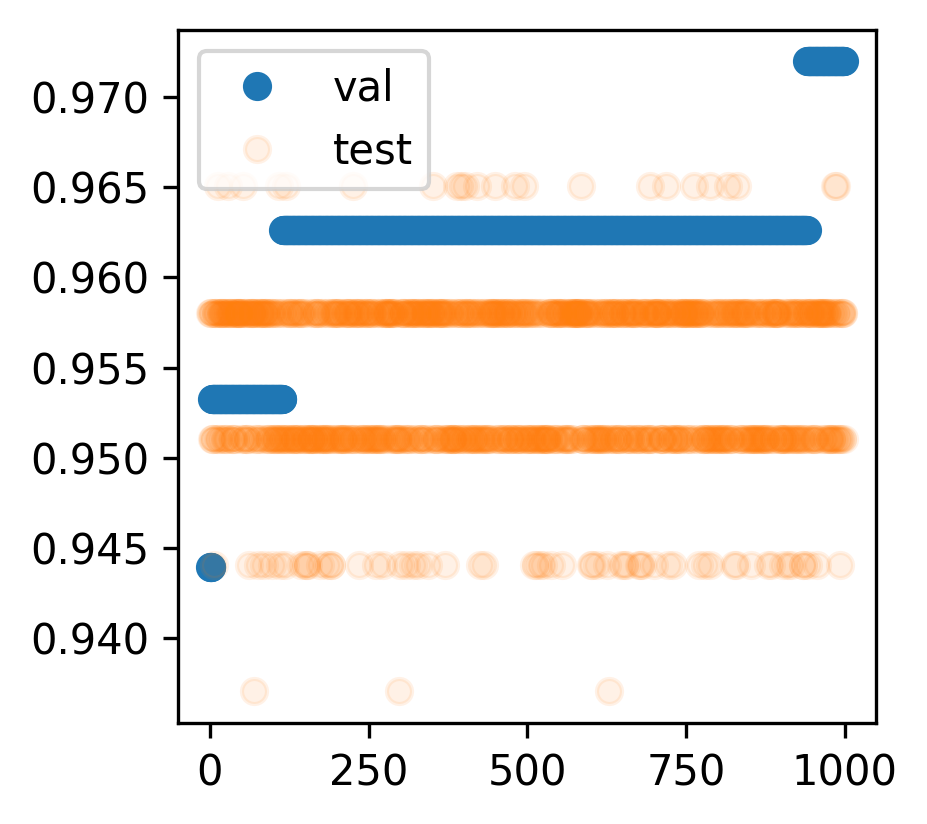

In [13]:
plt.figure(figsize=(3, 3))
sorting = np.argsort(val)
plt.plot(np.array(val)[sorting], "o", label="val")
plt.plot(np.array(test)[sorting], "o", label="test", alpha=.1)

plt.legend()

In [14]:
val_scores = []
neighbors = np.arange(1, 15, 2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
print("best validation score: {:.3f}".format(np.max(val_scores)))
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best validation score: 0.972
best n_neighbors: 11
test-set score: 0.958


# Cross validation

In [15]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

cross_val_scores = []
neighbors = np.arange(1, 15, 2)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))

print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best cross-validation score: 0.967
best n_neighbors: 11
test-set score: 0.944


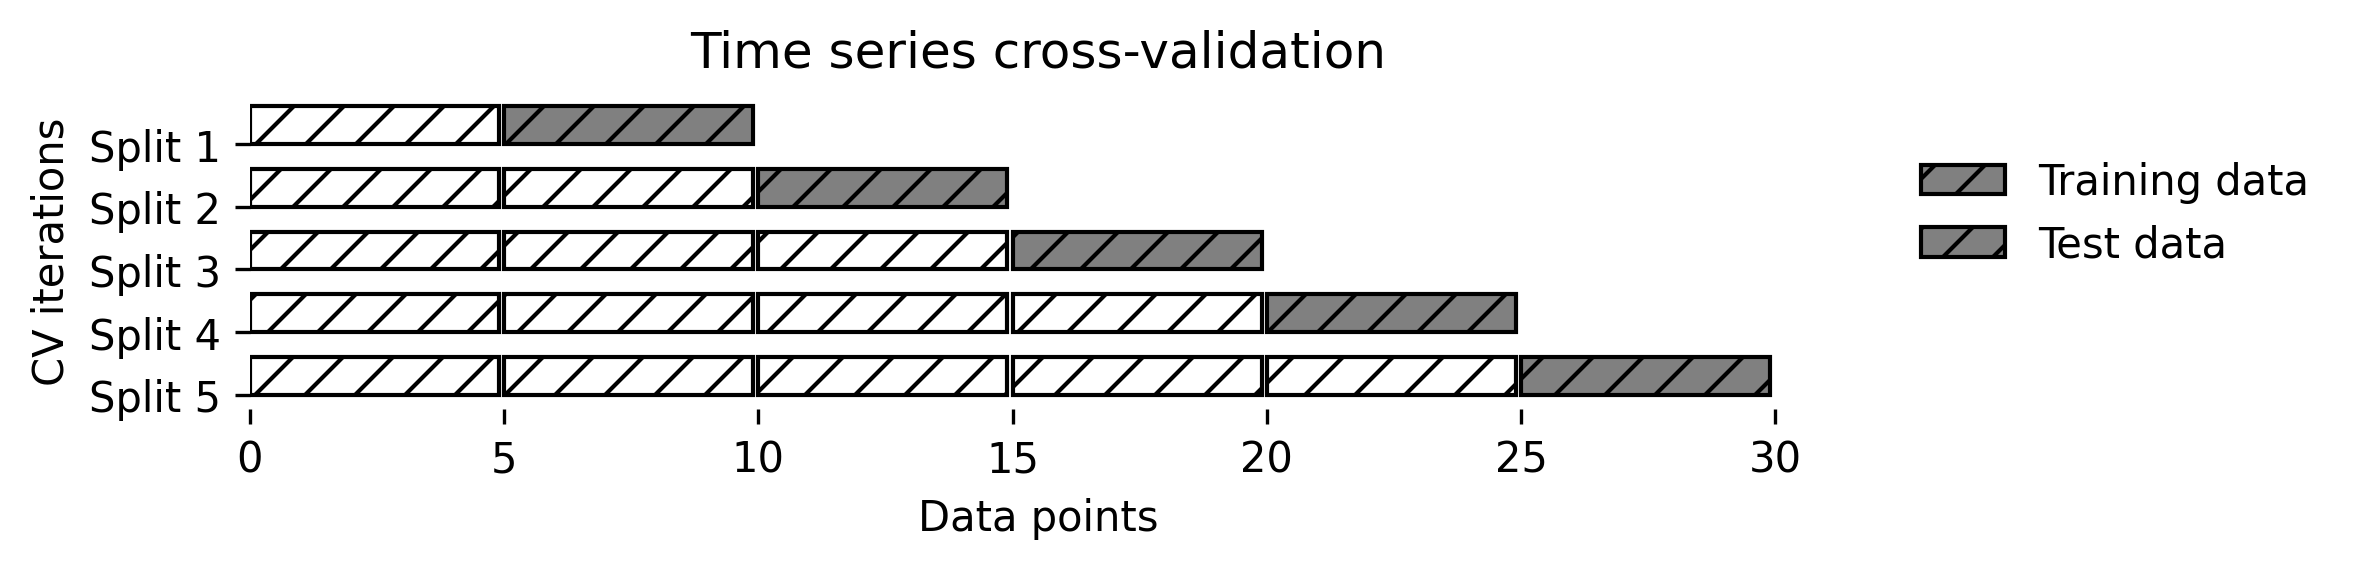

In [16]:
plt.figure(figsize=(8, 2))
plt.title("Time series cross-validation")
# don't think too much about how this figure is generated ...
axes = plt.gca()
axes.set_frame_on(False)

n_folds = 5
n_samples = 25

n_samples_per_fold = n_samples / float(n_folds)


for i in range(n_folds + 1):
    therange = range(max(i - 1, 0), n_folds)
    colors = ["w"] * len(therange)
    if i != 0:
        colors[0] = "grey"

    bars = plt.barh(y=therange, width=[n_samples_per_fold - 0.1] * len(therange),
           left=i * n_samples_per_fold, height=.6, color=colors, hatch="//", edgecolor='k')
axes.invert_yaxis()
axes.set_xlim(0, n_samples + 1 + n_samples_per_fold)
plt.ylabel("CV iterations")
plt.xlabel("Data points")
plt.yticks(np.arange(n_folds) + .3, ["Split %d" % x for x in range(1, n_folds + 1)])
plt.legend([bars[0], bars[-1]], ['Training data', 'Test data'], loc=(1.05, 0.4), frameon=False);
plt.tight_layout()

In [17]:
np.set_printoptions(precision=2)

In [18]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)
rs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

print("KFold:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=kfold)))

print("StratifiedKFold:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=skfold)))

print("ShuffleSplit:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=ss)))

print("RepeatedStratifiedKFold:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=rs)))

KFold:
[0.93 0.96 0.96 0.98 0.96]
StratifiedKFold:
[0.95 0.96 0.97 0.99 0.97]
ShuffleSplit:
[0.95 0.99 0.99 0.95 0.98 0.95 0.94 0.95 0.96 0.95 0.96 0.96 0.94 0.96
 0.94 0.94 0.98 0.94 0.98 0.94]
RepeatedStratifiedKFold:
[0.97 0.98 0.96 0.96 0.96 0.96 0.96 0.99 0.97 0.95 0.93 0.99 0.99 0.93
 0.97 0.96 0.94 0.98 0.98 0.96 0.96 0.99 0.97 0.96 0.95 0.96 0.98 0.97
 0.96 0.96 0.97 0.96 0.91 1.   0.98 0.96 0.97 0.97 0.96 0.97 0.97 0.97
 0.98 0.95 0.97 0.95 0.93 0.97 0.97 0.99]


# GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


param_grid = {'n_neighbors':  np.arange(1, 10, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: 0.972
best parameters: {'n_neighbors': 3}
test-set score: 0.965


In [20]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [21]:
results.params

,params
0,{'n_neighbors': 1}
1,{'n_neighbors': 3}
2,{'n_neighbors': 5}
3,{'n_neighbors': 7}
4,{'n_neighbors': 9}


In [22]:
len(results)

5

<Figure size 900x900 with 0 Axes>

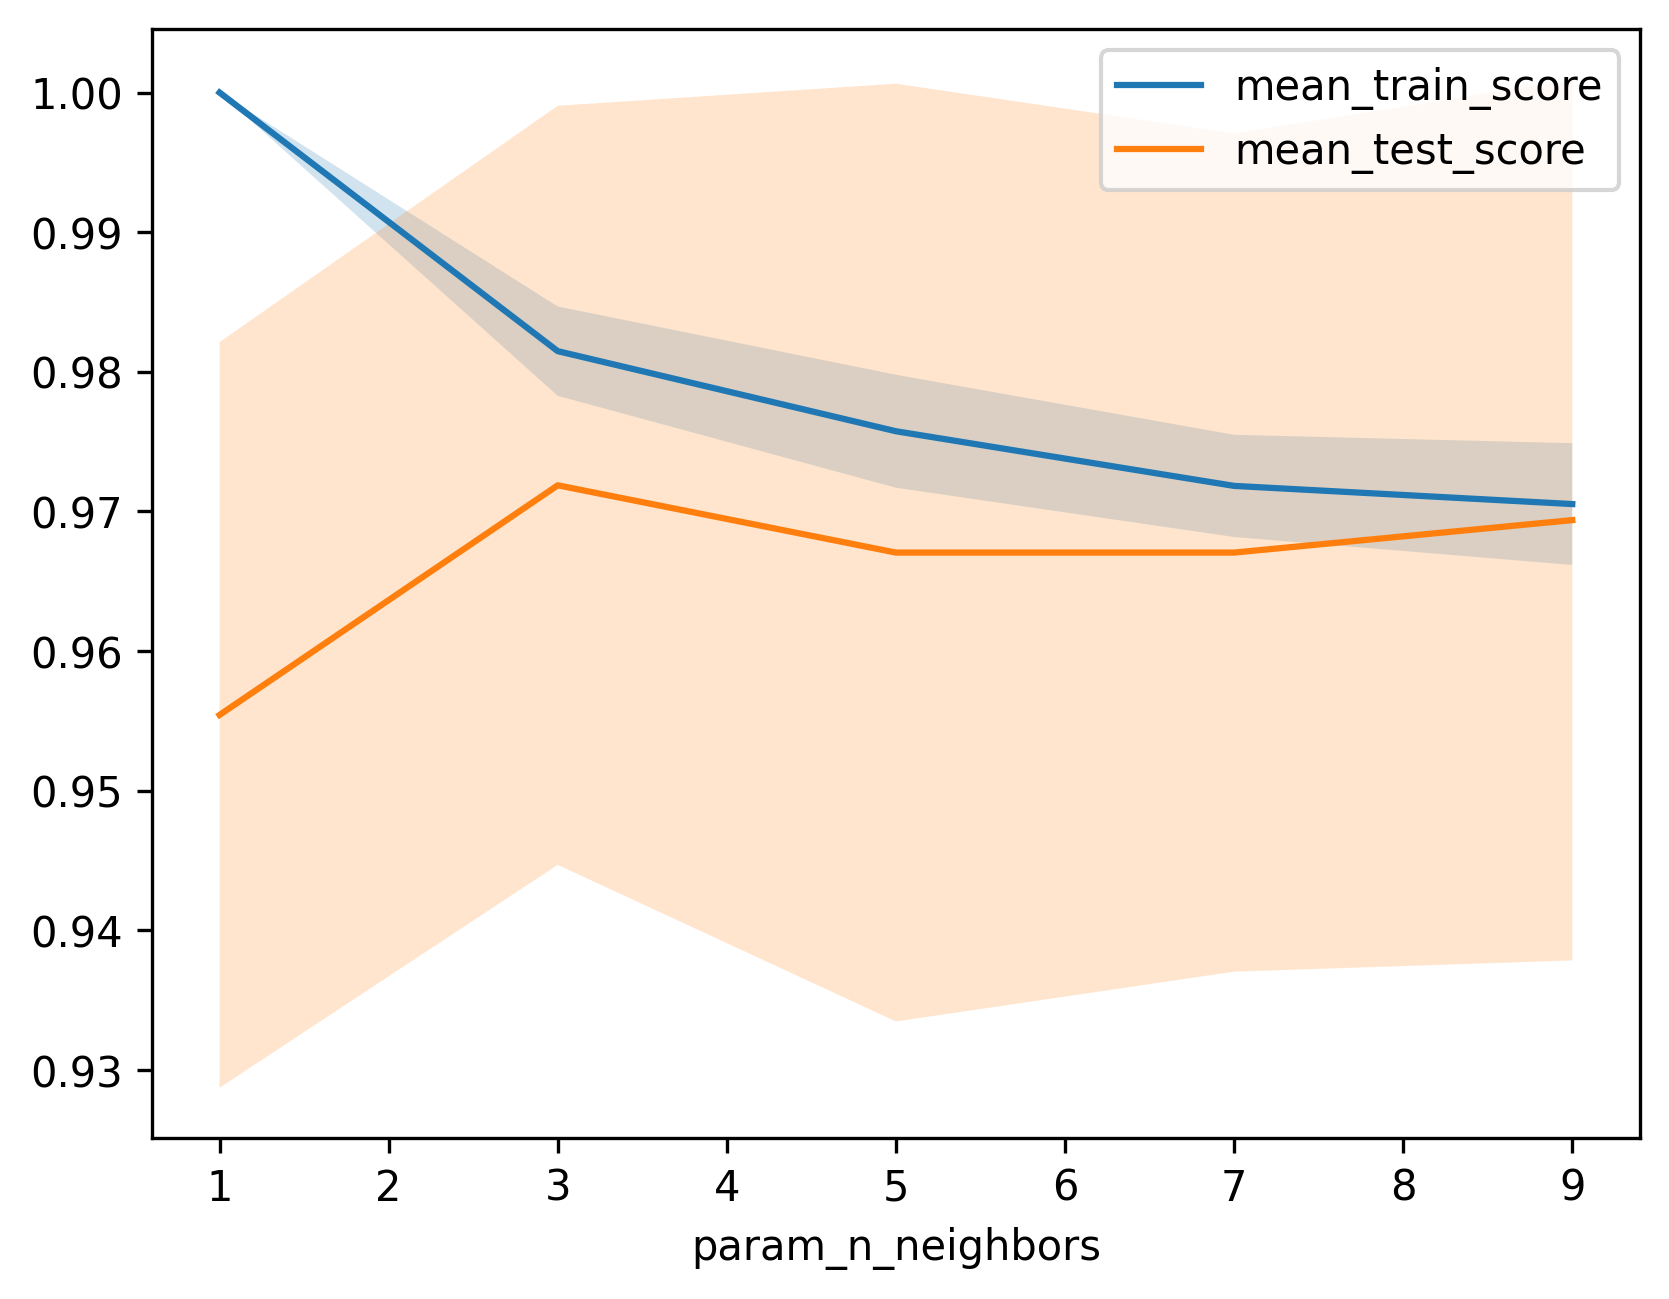

In [23]:
plt.figure(figsize=(3, 3))

results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_neighbors.astype(np.int64),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(np.int64),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
#plt.savefig("grid_search_n_neighbors.png", bbox_inches='tight')

In [24]:
from sklearn.model_selection import cross_validate
res = cross_validate(KNeighborsClassifier(), X, y, return_train_score=True,
                    cv=5, scoring=["accuracy", "roc_auc"])
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
0,0.001153,0.016083,0.964912,0.980220,0.996561,0.997662
1,0.001061,0.010426,0.956140,0.973626,0.983623,0.998614
2,0.001064,0.009020,0.982456,0.971429,0.999173,0.997131
3,0.001280,0.008110,0.956140,0.978022,0.983631,0.997730
4,0.001234,0.008070,0.964602,0.978070,0.994634,0.998026


In [25]:
res_df

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
0,0.001153,0.016083,0.964912,0.980220,0.996561,0.997662
1,0.001061,0.010426,0.956140,0.973626,0.983623,0.998614
2,0.001064,0.009020,0.982456,0.971429,0.999173,0.997131
3,0.001280,0.008110,0.956140,0.978022,0.983631,0.997730
4,0.001234,0.008070,0.964602,0.978070,0.994634,0.998026
